# Image Processing Assignment 1
_by Flavio Caroli, Luca Colaci, Vittorio Rossi_

First, we selected the following image to be used as the ground truth. Subject (B)eatrice is 162 cm tall, while subject (F)lavio's height is to be estimated. 

Then, we denoted the two subjects and highlighted some parallel lines:

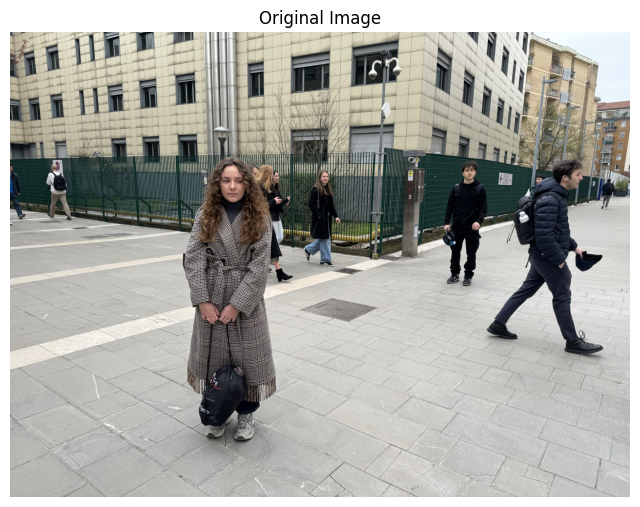

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the image
img = cv2.imread("../../data/IMG_0302.png")[:, :, ::-1]

# Load the data
# Data generated with streamlit app for labeling
data = pd.read_csv('../../data/image_0302_annotation.csv')

# Convert data to a dictionary for easier access by label
points_dict = {}
for _, row in data.iterrows():
    points_dict[row['label']] = np.array([row['x'], row['y'], 1])

# Display the original image
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img)
plt.title("Original Image")
plt.show()

In [117]:
def get_vanishing_point(lines):
    # Compute the vanishing point
    vertical_lines = np.vstack([*lines])
    _,_,vt = np.linalg.svd(vertical_lines)
    vanishing_point = vt[-1, :]
    vanishing_point = vanishing_point / vanishing_point[2]
    return vanishing_point

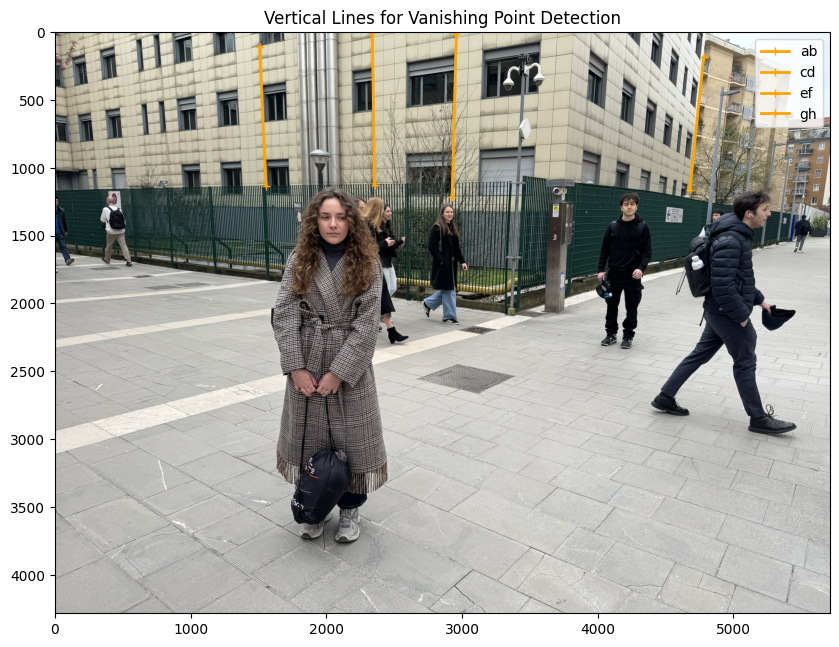

In [118]:
# Specifying vertical lines using points from the dataframe
# We'll use points labeled as wall_xx for vertical lines
a = points_dict['wall_10']
b = points_dict['wall_11']
c = points_dict['wall_20']
d = points_dict['wall_21']
e = points_dict['wall_30']
f = points_dict['wall_31']
g = points_dict['wall_40']
h = points_dict['wall_41']
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.plot([a[0], b[0]], [a[1], b[1]], marker="+", label="ab", linewidth=2, color="orange")
plt.plot([c[0], d[0]], [c[1], d[1]], marker="+", label="cd", linewidth=2, color="orange")
plt.plot([e[0], f[0]], [e[1], f[1]], marker="+", label="ef", linewidth=2, color="orange")
plt.plot([g[0], h[0]], [g[1], h[1]], marker="+", label="gh", linewidth=2, color="orange")
plt.legend()
plt.title("Vertical Lines for Vanishing Point Detection")
plt.show()

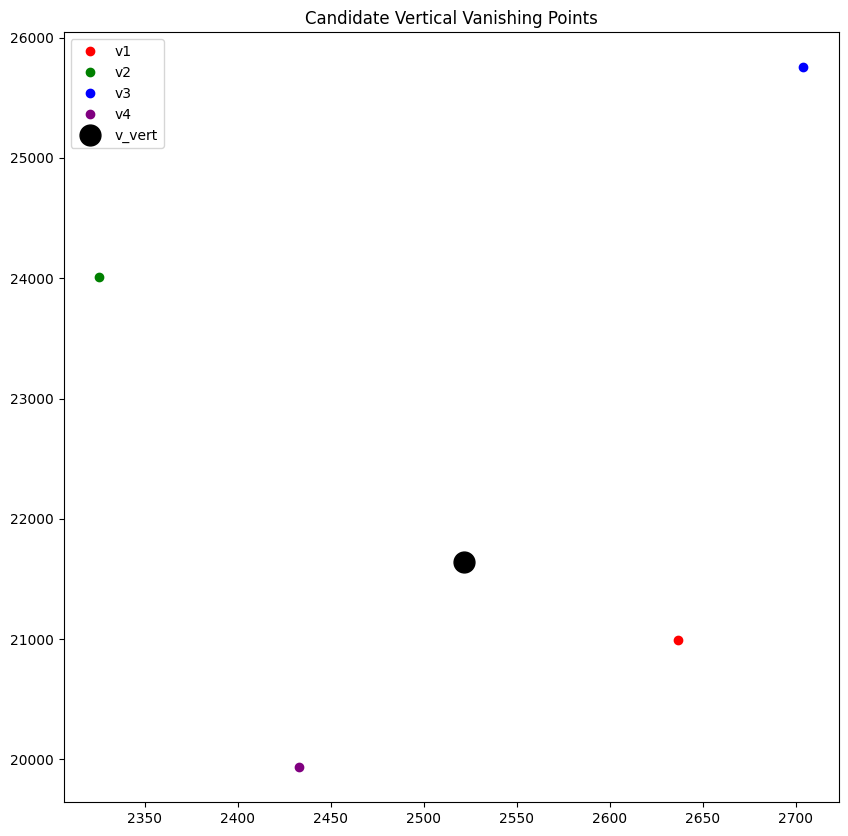

In [119]:
# Compute intersections between the lines to find the vanishing point
lab = np.cross(a, b)
lcd = np.cross(c, d)
lef = np.cross(e, f)
lgh = np.cross(g, h)

v1 = np.cross(lcd, lgh)
v2 = np.cross(lab, lgh)
v3 = np.cross(lcd, lef)
v4 = np.cross(lab, lef)

v1 = v1/v1[-1]
v2 = v2/v2[-1]
v3 = v3/v3[-1]
v4 = v4/v4[-1]

v_vert = get_vanishing_point([lab, lcd, lef, lgh])

plt.figure(figsize=(10,10))
plt.plot(v1[0], v1[1], "o", label="v1", color="red")
plt.plot(v2[0], v2[1], "o", label="v2", color="green")
plt.plot(v3[0], v3[1], "o", label="v3", color="blue")
plt.plot(v4[0], v4[1], "o", label="v4", color="purple")
plt.plot(v_vert[0], v_vert[1], "o", label="v_vert", color="black", markersize=15)
plt.legend()
plt.title("Candidate Vertical Vanishing Points")
plt.show()

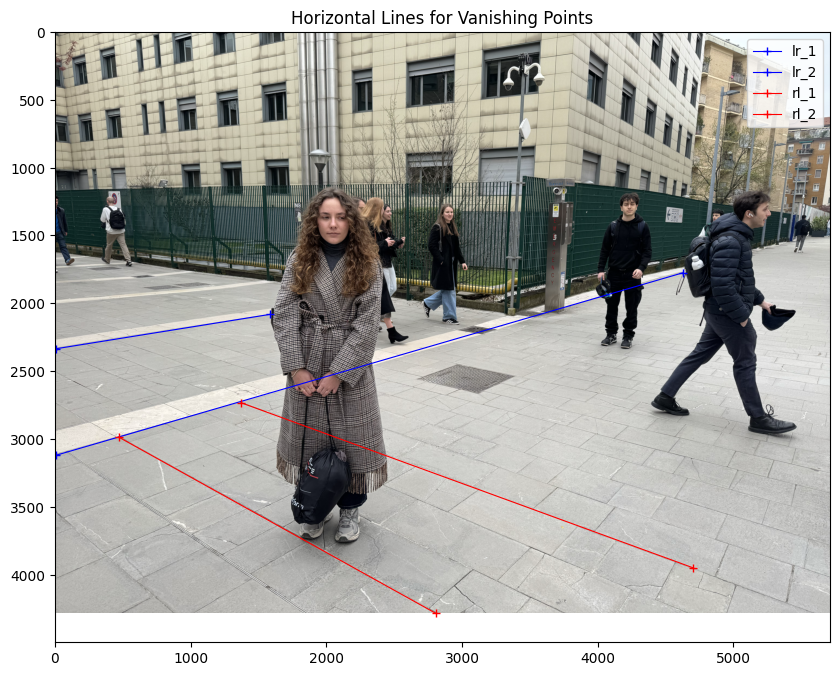

In [120]:
# Specifying horizontal lines (left-right) from the dataframe
i = points_dict['floor_10']
j = points_dict['floor_11']
k = points_dict['floor_20']
l = points_dict['floor_21']

lr_1 = np.cross(i, j)
lr_2 = np.cross(k, l)

lr_1 = lr_1/lr_1[-1]
lr_2 = lr_2/lr_2[-1]


# Specifying horizontal lines (left-right) from the dataframe
m = points_dict['floor_30']
n = points_dict['floor_31']
o = points_dict['floor_40']
p = points_dict['floor_41']

rl_1 = np.cross(m, n)
rl_2 = np.cross(o, p)

rl_1 = rl_1/rl_1[-1]
rl_2 = rl_2/rl_2[-1]


plt.figure(figsize=(10,10))
plt.imshow(img)

# Plot left-right lines
plt.plot([i[0], j[0]], [i[1], j[1]], marker="+", label="lr_1", linewidth=0.8, color="blue")
plt.plot([k[0], l[0]], [k[1], l[1]], marker="+", label="lr_2", linewidth=0.8, color="blue")
plt.plot([m[0], n[0]], [m[1], n[1]], marker="+", label="rl_1", linewidth=0.8, color="red")
plt.plot([o[0], p[0]], [o[1], p[1]], marker="+", label="rl_2", linewidth=0.8, color="red")
plt.legend()
plt.title("Horizontal Lines for Vanishing Points")
plt.show()

Text(0.5, 1.0, 'Horizontal Lines for Vanishing Points')

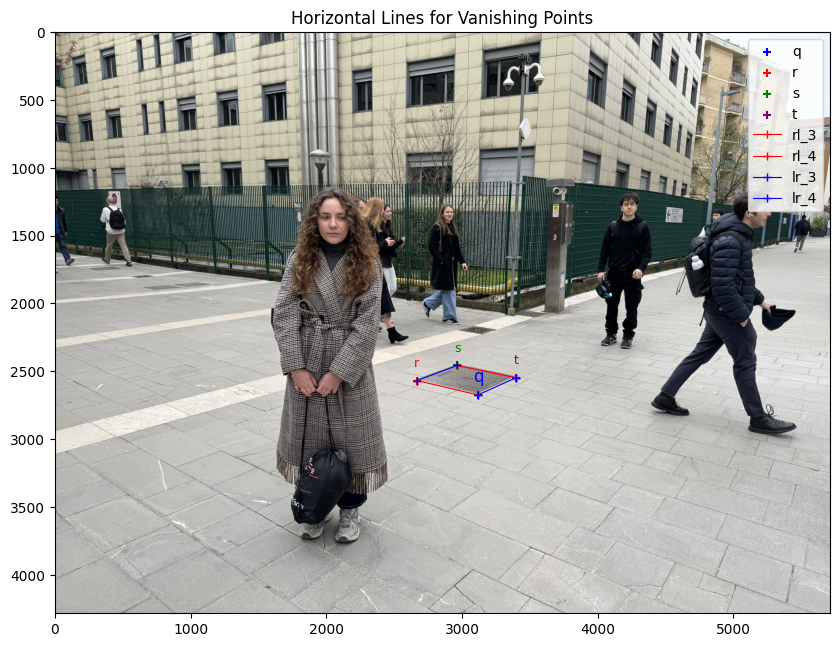

In [121]:
# manhole 
q = points_dict['floor_50']
r = points_dict['floor_51']
s = points_dict['floor_52']
t = points_dict['floor_53']

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.scatter(q[0], q[1], marker="+", label="q", color="blue")
plt.text(q[0], q[1] - 100, "q", color="blue", fontsize=12, ha='center')
plt.scatter(r[0], r[1], marker="+", label="r", color="red")
plt.text(r[0], r[1] - 100, "r", color="red", fontsize=9, ha='center')
plt.scatter(s[0], s[1], marker="+", label="s", color="green")
plt.text(s[0], s[1] - 100, "s", color="green", fontsize=9, ha='center')
plt.scatter(t[0], t[1], marker="+", label="t", color="purple")
plt.text(t[0], t[1] - 100, "t", color="purple", fontsize=9, ha='center')
plt.legend()


rl_3 = np.cross(q, r)
rl_4 = np.cross(s, t)

rl_3 = rl_3/rl_3[-1]
rl_4 = rl_4/rl_4[-1]

plt.plot([q[0], r[0]], [q[1], r[1]], marker="+", label="rl_3", linewidth=0.8, color="red")
plt.plot([s[0], t[0]], [s[1], t[1]], marker="+", label="rl_4", linewidth=0.8, color="red")

lr_3 = np.cross(q, t)
lr_4 = np.cross(r, s)

lr_3 = lr_3/lr_3[-1]
lr_4 = lr_4/lr_4[-1]

plt.plot([q[0], t[0]], [q[1], t[1]], marker="+", label="lr_3", linewidth=0.8, color="blue")
plt.plot([r[0], s[0]], [r[1], s[1]], marker="+", label="lr_4", linewidth=0.8, color="blue")

plt.legend()
plt.title("Horizontal Lines for Vanishing Points")

In [122]:
# Vanishing point and vanishing line for left-right lines using SVD
lr_1 = np.cross(i, j)
lr_2 = np.cross(k, l)

rl_1 = np.cross(m, n)
rl_2 = np.cross(o, p)

lr_1 = lr_1 / lr_1[-1]
lr_2 = lr_2 / lr_2[-1]

rl_1 = rl_1 / rl_1[-1]
rl_2 = rl_2 / rl_2[-1]

floor_lines1 = np.vstack([lr_1, lr_2, lr_3])
_, _, vt = np.linalg.svd(floor_lines1)
v_floor1 = vt[-1]
v_floor1 = v_floor1/v_floor1[-1]
print("First horizontal vanishing point:", v_floor1)

floor_lines2 = np.vstack([rl_1, rl_2, rl_3])
_, _, vt = np.linalg.svd(floor_lines2)
v_floor2 = vt[-1]
v_floor2 = v_floor2/v_floor2[-1]
print("Second horizontal vanishing point:", v_floor2)

First horizontal vanishing point: [5.99183951e+03 1.37493369e+03 1.00000000e+00]
Second horizontal vanishing point: [-2.44284894e+03  1.35720007e+03  1.00000000e+00]


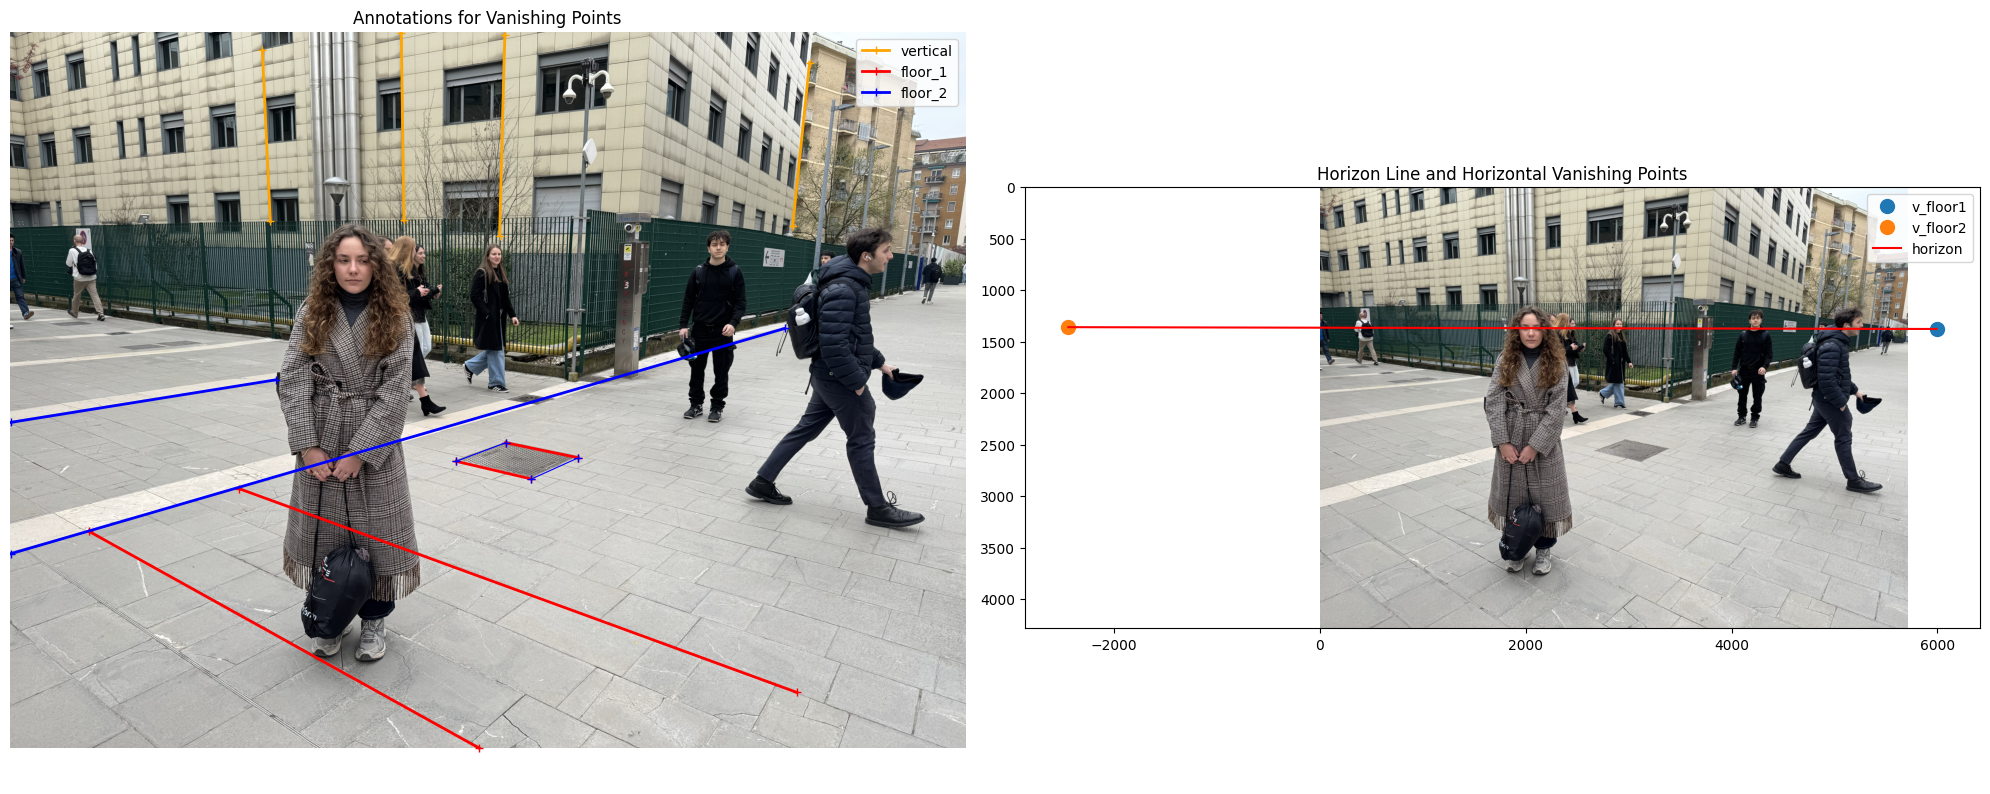

In [123]:
# Computing the horizon line
horizon = np.cross(v_floor1, v_floor2)
horizon = horizon / np.linalg.norm(horizon[:2])  # Normalize for visualization

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].axis('off')
# Left plot: Annotations for Vanishing Points
axes[0].imshow(img)
axes[0].plot([a[0], b[0]], [a[1], b[1]], marker="+", label="vertical", linewidth=2, color="orange")
axes[0].plot([c[0], d[0]], [c[1], d[1]], marker="+", linewidth=2, color="orange")
axes[0].plot([e[0], f[0]], [e[1], f[1]], marker="+", linewidth=2, color="orange")
axes[0].plot([g[0], h[0]], [g[1], h[1]], marker="+", linewidth=2, color="orange")

axes[0].plot([m[0], n[0]], [m[1], n[1]], marker="+", label="floor_1", linewidth=2, color="red")
axes[0].plot([o[0], p[0]], [o[1], p[1]], marker="+", linewidth=2, color="red")
axes[0].plot([q[0], r[0]], [q[1], r[1]], marker="+", linewidth=2, color="red")
axes[0].plot([s[0], t[0]], [s[1], t[1]], marker="+", linewidth=2, color="red")

axes[0].plot([i[0], j[0]], [i[1], j[1]], marker="+", label="floor_2", linewidth=2, color="blue")
axes[0].plot([k[0], l[0]], [k[1], l[1]], marker="+", linewidth=2, color="blue")
axes[0].plot([q[0], t[0]], [q[1], t[1]], marker="+", linewidth=0.8, color="blue")
axes[0].plot([r[0], s[0]], [r[1], s[1]], marker="+", linewidth=0.8, color="blue")

axes[0].legend()
axes[0].set_title("Annotations for Vanishing Points")

# Right plot: Horizon Line and Horizontal Vanishing Points

axes[1].imshow(img)
axes[1].plot(v_floor1[0], v_floor1[1], "o", label="v_floor1", markersize=10)
axes[1].plot(v_floor2[0], v_floor2[1], "o", label="v_floor2", markersize=10)
axes[1].plot([v_floor1[0], v_floor2[0]], [v_floor1[1], v_floor2[1]], 'r-', label="horizon", linewidth=1.5)
axes[1].legend()
axes[1].set_title("Horizon Line and Horizontal Vanishing Points")

plt.tight_layout()
plt.show()

In [124]:
# Building the (normalized) rectified homography
horizon_norm = horizon/np.linalg.norm(horizon)

H = np.hstack([np.eye(2), np.zeros((2, 1))])
H = np.vstack([H, horizon_norm])

H = H/H[-1, -1]

# Check that the horizon is mapped correctly
print(f"Verification - horizon mapped to infinity:\n{np.linalg.inv(H).T@horizon_norm.reshape((-1,1))}")

Verification - horizon mapped to infinity:
[[-1.41405100e-22]
 [ 0.00000000e+00]
 [ 9.99999731e-01]]


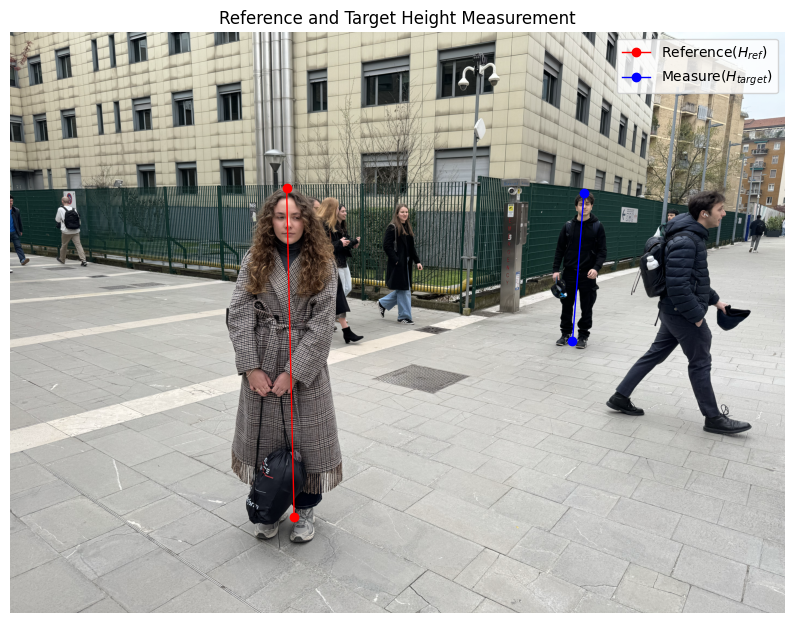

In [125]:
# Creating the reference points
ref_bottom = points_dict['ref_bottom']
ref_top = points_dict['ref_top']

measure_bottom = points_dict['measure_bottom']
measure_top = points_dict['measure_top']

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img)
plt.plot([ref_top[0], ref_bottom[0]], [ref_top[1], ref_bottom[1]],
         marker="o", label="Reference($H_{ref}$)", linewidth=1, color="red")
plt.plot([measure_top[0], measure_bottom[0]], [measure_top[1], measure_bottom[1]],
         marker="o", label="Measure($H_{target}$)", linewidth=1, color="blue")
plt.legend()
plt.title("Reference and Target Height Measurement")
plt.show()


Reference height: 162 cm
Estimated target height: 161.87 cm


Text(0.5, 1.0, 'Height Estimation Results')

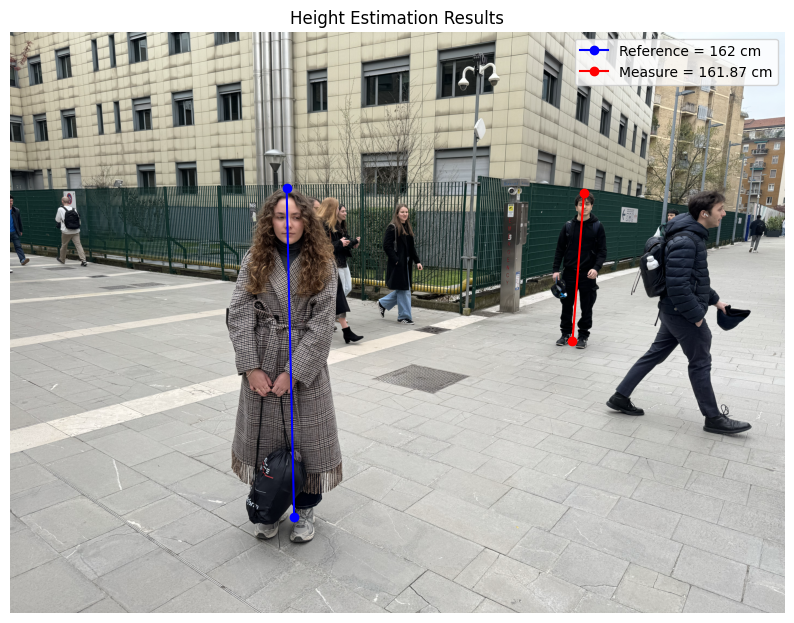

In [126]:
ref_height = 162

def estimate_height(ref_bottom, ref_top, target_bottom, target_top,
    v_vert, horizon, ref_height):
    u = np.cross(np.cross(ref_bottom, target_bottom), horizon)
    u = u/u[-1]
    l_measure = np.cross(ref_bottom, v_vert)
    ref_top_tilde = np.cross(np.cross(ref_top, u),l_measure)
    ref_top_tilde = ref_top_tilde/ref_top_tilde[-1]

    dist_ref_top_tilde = np.linalg.norm(ref_top_tilde - ref_bottom)
    dist_measure_top = np.linalg.norm(measure_bottom - ref_bottom)
    dist_vert = np.linalg.norm(v_vert - measure_bottom)
    
    dist_ref_measure_ratio = dist_ref_top_tilde * (dist_vert - dist_measure_top)/(dist_measure_top*(dist_vert-dist_ref_top_tilde))

    return ref_height / dist_ref_measure_ratio

# Estimate the height using the function
measured_height = estimate_height(ref_bottom, ref_top, measure_bottom, measure_top,
    v_vert, horizon_norm, ref_height)
measured_height
print(f"Reference height: {ref_height} cm")
print(f"Estimated target height: {measured_height:.2f} cm")

# Final visualization with measurements
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img)

# Draw the reference and measured heights
plt.plot([ref_top[0], ref_bottom[0]], [ref_top[1], ref_bottom[1]],
         marker="o", label=f"Reference = {ref_height} cm", linewidth=1.5, color='blue')
plt.plot([measure_top[0], measure_bottom[0]], [measure_top[1], measure_bottom[1]],
         marker="o", label=f"Measure = {measured_height:.2f} cm", linewidth=1.5, color='red')

# Add legend and title
plt.legend()
plt.title("Height Estimation Results")

In [127]:
def cross_ratio(a, b, c, d):
    """
    Compute the cross-ratio of four collinear points.
    CR(a,b,c,d) = ((a-c)*(b-d))/((a-d)*(b-c))
    
    This implements the cross-ratio formula from the theoretical section.
    For points in homogeneous coordinates, we project them onto a 1D line
    to compute a meaningful ratio.
    """
    # Convert to 1D if they're homogeneous coordinates
    if len(a) > 1:
        # Project points onto the line connecting them
        line = np.cross(a, d)  # Line through points
        # Get a direction vector along the line
        direction = np.array([line[1], -line[0]])
        direction = direction / np.linalg.norm(direction)
        
        # Project points onto this direction
        a_proj = np.dot(a[:2], direction)
        b_proj = np.dot(b[:2], direction)
        c_proj = np.dot(c[:2], direction)
        d_proj = np.dot(d[:2], direction)
        
        # Compute cross-ratio in 1D
        return ((a_proj-c_proj)*(b_proj-d_proj))/((a_proj-d_proj)*(b_proj-c_proj))
    else:
        # Already 1D
        return ((a-c)*(b-d))/((a-d)*(b-c))

# Get the reference line (projection onto vertical vanishing line)
ref_line = np.cross(ref_bottom, v_vert)
ref_line = ref_line / np.linalg.norm(ref_line[:2])

# Get the measure line (projection onto vertical vanishing line)
measure_line = np.cross(measure_bottom, v_vert)
measure_line = measure_line / np.linalg.norm(measure_line[:2])

# Get the horizon intersection points
ref_horizon = np.cross(ref_line, horizon)
ref_horizon = ref_horizon / ref_horizon[2]  # Normalize

measure_horizon = np.cross(measure_line, horizon)
measure_horizon = measure_horizon / measure_horizon[2]  # Normalize

# Compute the cross-ratios
cr_reference = cross_ratio(v_vert, ref_bottom, ref_top, ref_horizon)
cr_measure = cross_ratio(v_vert, measure_bottom, measure_top, measure_horizon)

# The ratio of heights is directly related to the ratio of cross-ratios
# H_measure/H_reference = CR_reference/CR_measure
height_ratio = cr_reference / cr_measure

# Known reference height in cm
ref_height = 162  # Height in cm

# Calculate the measured height using cross-ratio
measured_height = ref_height * height_ratio
print(f"Reference height: {ref_height} cm")
print(f"Estimated target height: {measured_height:.2f} cm")

Reference height: 162 cm
Estimated target height: 176.80 cm


Text(0.5, 1.0, 'Height Estimation Results')

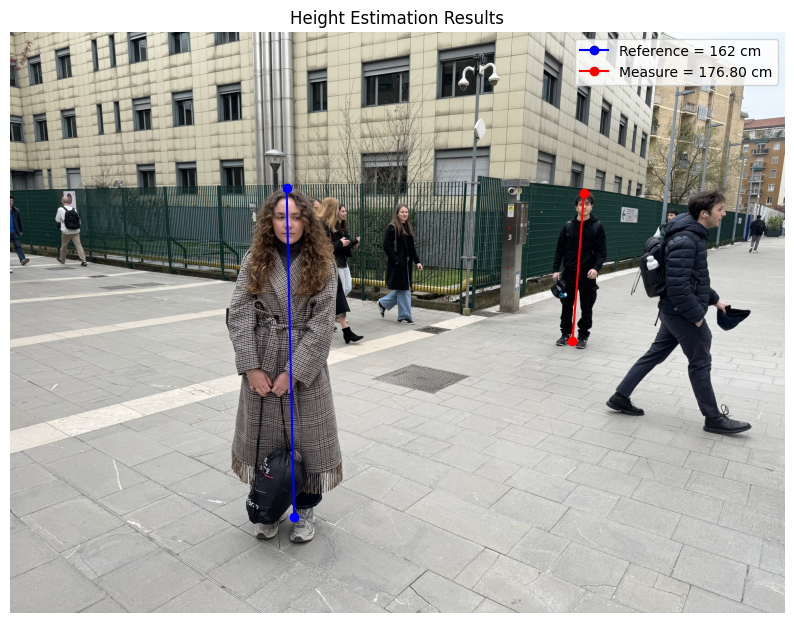

In [128]:
# Final visualization with measurements
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img)

# Draw the reference and measured heights
plt.plot([ref_top[0], ref_bottom[0]], [ref_top[1], ref_bottom[1]],
         marker="o", label=f"Reference = {ref_height} cm", linewidth=1.5, color='blue')
plt.plot([measure_top[0], measure_bottom[0]], [measure_top[1], measure_bottom[1]],
         marker="o", label=f"Measure = {measured_height:.2f} cm", linewidth=1.5, color='red')

# Add legend and title
plt.legend()
plt.title("Height Estimation Results")

Text(0.5, 1.0, 'Height Estimation Results with Logarithmic Vertical Axis')

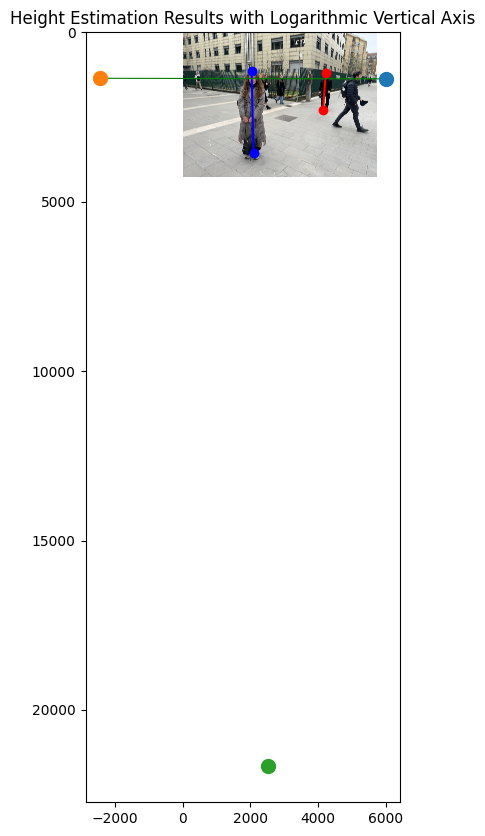

In [ ]:
# Final visualization with measurements
plt.figure(figsize=(10, 10))
plt.imshow(img)

# Draw the reference and measured heights
plt.plot([ref_top[0], ref_bottom[0]], [ref_top[1], ref_bottom[1]],
         marker="o", label=f"Reference = {ref_height} cm", linewidth=1.5, color='blue')
plt.plot([measure_top[0], measure_bottom[0]], [measure_top[1], measure_bottom[1]],
         marker="o", label=f"Measure = {measured_height:.2f} cm", linewidth=1.5, color='red')

# Plot horizon line
plt.plot([v_floor1[0], v_floor2[0]], [v_floor1[1], v_floor2[1]], 'g-', label="horizon", linewidth=0.8)
plt.plot(v_floor1[0], v_floor1[1], "o", label="v_floor1", markersize=10)
plt.plot(v_floor2[0], v_floor2[1], "o", label="v_floor2", markersize=10)

# Plot vertical vanishing point
plt.plot(v_vert[0], v_vert[1], "o", label="v_vert", markersize=10)

# Set logarithmic scale for the y-axis
plt.yscale('linear')

# Add legend and title
plt.title("Height Estimation Results with Logarithmic Vertical Axis")

<>:115: SyntaxWarning: invalid escape sequence '\e'
<>:115: SyntaxWarning: invalid escape sequence '\e'
/var/folders/nz/rtq9l4590h118vvgvrm2s6dr0000gn/T/ipykernel_78896/4268036793.py:115: SyntaxWarning: invalid escape sequence '\e'
  ax_inset.annotate('$V_{ref} \equiv V_{target}$',


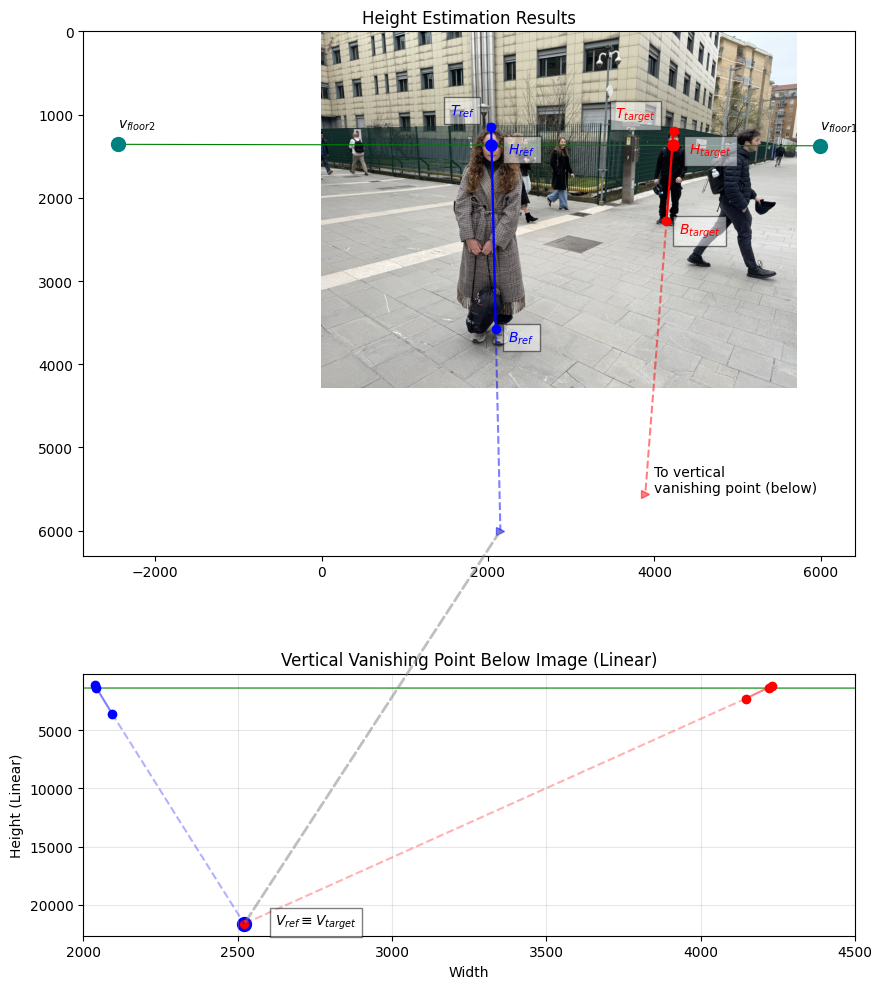

In [166]:
from matplotlib.patches import ConnectionPatch, Wedge
import numpy as np
import matplotlib.pyplot as plt

# Create a custom scale function that divides by 100
def forward(x):
    return x / 1000

def inverse(x):
    return x * 1000

# Create figure with two subplots - main image and inset for vanishing point
fig = plt.figure(figsize=(12, 10))
grid = plt.GridSpec(2, 1, figure=fig, height_ratios=[2, 1])

# Main plot showing the image and measurements
ax_main = fig.add_subplot(grid[0])
ax_main.imshow(img)

# Colors
ref_color = 'blue'
measure_color = 'red'

# Draw the reference and measured heights - without labels
ax_main.plot([ref_top[0], ref_bottom[0]], [ref_top[1], ref_bottom[1]],
        marker="o", linewidth=1.5, color=ref_color)
ax_main.plot([measure_top[0], measure_bottom[0]], [measure_top[1], measure_bottom[1]],
        marker="o", linewidth=1.5, color=measure_color)
ax_main.annotate('$B_{ref}$', (ref_bottom[0] + 150, ref_bottom[1] + 150), fontsize=10, color=ref_color, bbox=dict(alpha=0.5, fc='white'))
ax_main.annotate('$B_{target}$', (measure_bottom[0] + 150, measure_bottom[1] + 150), fontsize=10, color=measure_color, bbox=dict(alpha=0.5, fc='white'))
ax_main.annotate('$T_{ref}$', (ref_top[0] - 500, ref_top[1] - 150), fontsize=10, color=ref_color, bbox=dict(alpha=0.5, fc='white'))
ax_main.annotate('$T_{target}$', (measure_top[0] - 700, measure_top[1] - 150), fontsize=10, color=measure_color, bbox=dict(alpha=0.5, fc='white'))



# Plot horizon line - without labels
ax_main.plot([v_floor1[0], v_floor2[0]], [v_floor1[1], v_floor2[1]], 'g-', linewidth=0.8)
ax_main.plot(v_floor1[0], v_floor1[1], "o", markersize=10, color="teal")
ax_main.plot(v_floor2[0], v_floor2[1], "o", markersize=10, color="teal")

ax_main.annotate('$v_{floor1}$', (v_floor1[0], v_floor1[1] - 200), fontsize=10)
ax_main.annotate('$v_{floor2}$', (v_floor2[0], v_floor2[1] - 200), fontsize=10)


# Calculate intersection points of horizon line with the lines from vanishing point to bottom points
# First get the horizon line equation (y = constant)
horizon_y = v_floor1[1]  # horizon is horizontal, so y is constant

# Calculate intersection for reference line
# Line from vanishing point to reference bottom

horizon_line = np.cross(v_floor1, v_floor2)
horizon_line = horizon_line / np.linalg.norm(horizon_line[:2])


# Compute reference vertical line (line through ref_bottom and v_vert)
ref_vertical_line = np.cross(ref_bottom, v_vert)
ref_vertical_line = ref_vertical_line / np.linalg.norm(ref_vertical_line[:2])

# Compute measure vertical line (line through measure_bottom and v_vert)
measure_vertical_line = np.cross(measure_bottom, v_vert)
measure_vertical_line = measure_vertical_line / np.linalg.norm(measure_vertical_line[:2])

# Find intersection of vertical lines with horizon
ref_horizon_intersection = np.cross(horizon_line, ref_vertical_line)
ref_horizon_intersection = ref_horizon_intersection / ref_horizon_intersection[2]  # Normalize

measure_horizon_intersection = np.cross(horizon_line, measure_vertical_line)
measure_horizon_intersection = measure_horizon_intersection / measure_horizon_intersection[2]  # Normalize

# Add lines extending toward the vanishing point
extension_factor = 1  # Extend the lines beyond the image
# Calculate vector from bottom to top for reference (since vanishing point is below)
ref_vec = np.array(ref_top) - np.array(ref_bottom)
ref_extended = np.array(ref_bottom) - extension_factor * ref_vec
# Calculate vector from bottom to top for measurement
measure_vec = np.array(measure_top) - np.array(measure_bottom)
measure_extended = np.array(measure_bottom) - (3*extension_factor) * measure_vec

# Plot extended lines - keeping the original arrows and directions
ax_main.plot([ref_top[0], ref_extended[0]], [ref_top[1], ref_extended[1]], '-->', color=ref_color, alpha=0.5)
ax_main.plot([measure_top[0], measure_extended[0]], [measure_top[1], measure_extended[1]], '-->', color=measure_color, alpha=0.5)


# Additionally plot lines to horizon intersection points
ax_main.plot([ref_bottom[0], ref_horizon_intersection[0]], [ref_bottom[1], ref_horizon_intersection[1]], '--', color=ref_color, alpha=0.3)
ax_main.plot([measure_bottom[0], measure_horizon_intersection[0]], [measure_bottom[1], measure_horizon_intersection[1]], '--', color=measure_color, alpha=0.3)

# Plot the horizon intersection points
ax_main.plot(ref_horizon_intersection[0], ref_horizon_intersection[1], 'o', markersize=8, color=ref_color)
ax_main.plot(measure_horizon_intersection[0], measure_horizon_intersection[1], 'o', markersize=8, color=measure_color)
ax_main.annotate('$H_{ref}$', (ref_horizon_intersection[0] + 200, ref_horizon_intersection[1] + 100), fontsize=10, bbox=dict(alpha=0.5, fc='white'), color = ref_color)
ax_main.annotate('$H_{target}$', (measure_horizon_intersection[0] + 200, measure_horizon_intersection[1] + 100), fontsize=10, color=measure_color, bbox=dict(alpha=0.5, fc='white'))

# Add an arrow indicating the direction of the vanishing point
ax_main.annotate('To vertical\nvanishing point (below)', 
                xy=(measure_extended[0]+100, measure_extended[1]), 
                xytext=(measure_extended[0] + 100, measure_extended[1] - 20),
                fontsize=10)

# Add a small inset showing the vanishing point location in the global context
ax_inset = fig.add_subplot(grid[1])

# Plot the vertical vanishing point with half-half coloring
# Using two wedges (half circles) for the vanishing point
vanishing_point_size = 10
ax_inset.scatter(v_vert[0], v_vert[1], s=vanishing_point_size**2, 
                 marker='o', color='blue', 
                 label="Vertical vanishing point")

# Add a black edge to make it stand out
ax_inset.scatter(v_vert[0], v_vert[1], s=vanishing_point_size**1.5,
                 marker='o', color="red")

ax_inset.annotate('$V_{ref} \equiv V_{target}$',
                  xy=(v_vert[0], v_vert[1]),
                  xytext=(v_vert[0]+100, v_vert[1]+100),
                  fontsize=10, color='black', bbox=dict(alpha=0.5, fc='white'))

# Plot the horizon line in the inset
ax_inset.plot([v_floor1[0], v_floor2[0]], [v_floor1[1], v_floor2[1]], 'g-', linewidth=0.8)

# Plot reference points and lines in the inset
ax_inset.plot([ref_top[0], ref_bottom[0]], [ref_top[1], ref_bottom[1]], color=ref_color, alpha=0.5)
ax_inset.plot(ref_top[0], ref_top[1], 'o', markersize=6, color=ref_color)
ax_inset.plot(ref_bottom[0], ref_bottom[1], 'o', markersize=6, color=ref_color)
ax_inset.plot(ref_horizon_intersection[0], ref_horizon_intersection[1], 'o', markersize=6, color=ref_color)
ax_inset.plot([ref_bottom[0], v_vert[0]], [ref_bottom[1], v_vert[1]], '--', color=ref_color, alpha=0.3)


# Plot measure points and lines in the inset
ax_inset.plot([measure_top[0], measure_bottom[0]], [measure_top[1], measure_bottom[1]], color=measure_color, alpha=0.5)
ax_inset.plot(measure_top[0], measure_top[1], 'o', markersize=6, color=measure_color)
ax_inset.plot(measure_bottom[0], measure_bottom[1], 'o', markersize=6, color=measure_color)
ax_inset.plot(measure_horizon_intersection[0], measure_horizon_intersection[1], 'o', markersize=6, color=measure_color)
ax_inset.plot([measure_bottom[0], v_vert[0]], [measure_bottom[1], v_vert[1]], '--', color=measure_color, alpha=0.3)

# For a vanishing point below the image, we need to use a negative log scale
# First invert the y-axis so that negative values are at the bottom
ax_inset.invert_yaxis()
# Then use a linear scale
ax_inset.set_yscale('linear')

ax_inset.set_xlim(2000, 4500)

ax_inset.set_ylabel('Height (Linear)')
ax_inset.set_xlabel('Width')
ax_inset.grid(True, alpha=0.3)

# Add titles without legends
ax_main.set_title("Height Estimation Results")
ax_inset.set_title("Vertical Vanishing Point Below Image (Linear)")

# Add a connection patch to show the relationship between the two plots
con = ConnectionPatch(xyA=(ref_extended[0], ref_extended[1]), coordsA=ax_main.transData,
                     xyB=(v_vert[0], v_vert[1]), coordsB=ax_inset.transData,
                     linestyle="--", color="gray", alpha=0.5, linewidth=2)
fig.add_artist(con)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

pos1 = ax_main.get_position()
pos2 = ax_inset.get_position()
# Set the width and x position of the bottom plot to match the top plot
ax_inset.set_position([pos1.x0, pos2.y0, pos1.width, pos2.height])

plt.show()